<a href="https://colab.research.google.com/github/SebasM2000/DataBase_Sttcs/blob/main/comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount("/content/gdrive", force_remount = True)
#%cd /content/gdrive/MyDrive/parcial_computac/DataBase_Sttcs

#! git pull

In [2]:
# Librerías
%autosave 60
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

Autosaving every 60 seconds


> **Nota:** En este trabajo, se eligieron las primeras 31 columnas (que se exponen en las siguiente celda) para facilitar el análisis de nuestra base de datos. Además, consideramos que las variables elegidas son las más relevantes para nuestro estudio.

In [3]:
# Abriendo archivo csv
datos = pd.read_csv("METABRIC_RNA_Mutation.csv")
datos.columns[:31]

C:\Users\s\AppData\Local\Temp\ipykernel_2480\565455140.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv("METABRIC_RNA_Mutation.csv")


Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

> <h2> Primer paso: selección y explicación de variables </h2>
>
> Inicialmente, se seleccionan las variables que se utilizarán y se analiza cada columna individualmente para determinar si tiene un significado coherente en el modelo que se vaya a realizar. Así, la contribución de cada columna es la siguiente:
>
> - **patient_id:** Es la identificación única de cada paciente
> - **type_of_breast_surgery:** Expone el tipo de cirugía a la que fue sometida cada paciente.
> - **cancer_type_detailed:** Contiene la información específica del tipo de cáncer detectado.
> - **cellularity:** Describe las celulas cancerosas que se detectan en el tumor.
> - **neoplasm_histologic_grade:** Describe el aspecto de las células cancerosas en comparación con las células sana de 1 a 3.
> - **lymph_nodes_examined_positive:** Describe cuantos ganglios linfáticos han detectado células cancerosas.
> - **nottingham_prognostic_index:** Evalua el grado de deformacion de las celulas de 1 a 9.
> - **overall_survival_months:** Determina cuantos meses quedan de vida en los pacientes.
> - **tumor_stage:** Describe cuanto cancer hay en el cuerpo clasificando en etapas de 1 a 4.
> - **death_from_cancer:** Pacientes que murieron por cancer o por otras circunstancias.
>
> Esta información es proporcionada por Breastcancer.org.
Donar para apoyar recursos gratuitos y programación para las personas afectadas por cáncer de mama: https://give.breastcancer.org/give/297660/#!/donation/checkout?c_src=clipboard&c_src2=text-link

In [4]:
# Tabla de las variables seleccionadas
analisis = pd.DataFrame(datos, columns = ["patient_id","overall_survival", 
                                      "cancer_type_detailed", "cellularity","neoplasm_histologic_grade",
                                      "lymph_nodes_examined_positive", "nottingham_prognostic_index",
                                      "tumor_size", "hormone_therapy","death_from_cancer"])
analisis

,patient_id,overall_survival,cancer_type_detailed,cellularity,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,tumor_size,hormone_therapy,death_from_cancer
0,0,1,Breast Invasive Ductal Carcinoma,NaN,3.0,10.0,6.044,22.0,1,Living
1,2,1,Breast Invasive Ductal Carcinoma,High,3.0,0.0,4.020,10.0,1,Living
2,5,0,Breast Invasive Ductal Carcinoma,High,2.0,1.0,4.030,15.0,1,Died of Disease
3,6,1,Breast Mixed Ductal and Lobular Carcinoma,Moderate,2.0,3.0,4.050,25.0,1,Living
4,8,0,Breast Mixed Ductal and Lobular Carcinoma,High,3.0,8.0,6.080,40.0,1,Died of Disease
...,...,...,...,...,...,...,...,...,...,...
1899,7295,1,Breast Invasive Lobular Carcinoma,High,3.0,1.0,5.050,25.0,1,Living
1900,7296,0,Breast Invasive Ductal Carcinoma,High,3.0,1.0,5.040,20.0,0,Died of Disease
1901,7297,0,Breast Invasive Ductal Carcinoma,High,3.0,45.0,6.050,25.0,1,Died of Disease
1902,7298,0,Breast Invasive Ductal Carcinoma,Moderate,2.0,12.0,5.050,25.0,1,Died of Other Causes


In [5]:
analisis.info()
analisis.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     1904 non-null   int64  
 1   overall_survival               1904 non-null   int64  
 2   cancer_type_detailed           1889 non-null   object 
 3   cellularity                    1850 non-null   object 
 4   neoplasm_histologic_grade      1832 non-null   float64
 5   lymph_nodes_examined_positive  1904 non-null   float64
 6   nottingham_prognostic_index    1904 non-null   float64
 7   tumor_size                     1884 non-null   float64
 8   hormone_therapy                1904 non-null   int64  
 9   death_from_cancer              1903 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 148.9+ KB


patient_id                        0
overall_survival                  0
cancer_type_detailed             15
cellularity                      54
neoplasm_histologic_grade        72
lymph_nodes_examined_positive     0
nottingham_prognostic_index       0
tumor_size                       20
hormone_therapy                   0
death_from_cancer                 1
dtype: int64

> <h2> Segundo paso </h2>
>
> Ahora, se deben eliminar aquellos datos que no aporten a la base de datos, es decir, los valores nulos; ya que pueden generar errores en los diferentes parámetros estadísticos que se calculen como la mediana, el promedio, la media, entre otros.
>
> El propósito de la siguiente celda es eliminar aquellas filas cuyos valores **NO** nulos ocupen al menos un 80% de los datos, ya que consideramos que si faltan al menos dos datos de cada paciente, puede dificultar el diagnóstico del mismo. El resultado fue que se eliminaron 6 filas. Posteriormente, se rectificó que no hubiesen identificaciones duplicadas en la base de datos, ya que es el único dato irrepetible.

In [6]:
# Porcentaje de valores no nulos para la limpieza
porcentaje = 0.8

# Eliminación de valores nulos con cierto umbral
limpieza_1 = analisis.dropna(thresh = porcentaje*len(analisis.columns))
limpieza_1 = limpieza_1.dropna(thresh = porcentaje*len(analisis), axis = 1)
limpieza_1 = limpieza_1.drop_duplicates(["patient_id"])
limpieza_1

# Nota: Prestar atención a cualquier columna que:
# Esté mal formateada,
# Requiere más datos o mucho procesamiento para convertirse en una característica útil
# Contiene información redundante

,patient_id,overall_survival,cancer_type_detailed,cellularity,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,tumor_size,hormone_therapy,death_from_cancer
0,0,1,Breast Invasive Ductal Carcinoma,NaN,3.0,10.0,6.044,22.0,1,Living
1,2,1,Breast Invasive Ductal Carcinoma,High,3.0,0.0,4.020,10.0,1,Living
2,5,0,Breast Invasive Ductal Carcinoma,High,2.0,1.0,4.030,15.0,1,Died of Disease
3,6,1,Breast Mixed Ductal and Lobular Carcinoma,Moderate,2.0,3.0,4.050,25.0,1,Living
4,8,0,Breast Mixed Ductal and Lobular Carcinoma,High,3.0,8.0,6.080,40.0,1,Died of Disease
...,...,...,...,...,...,...,...,...,...,...
1899,7295,1,Breast Invasive Lobular Carcinoma,High,3.0,1.0,5.050,25.0,1,Living
1900,7296,0,Breast Invasive Ductal Carcinoma,High,3.0,1.0,5.040,20.0,0,Died of Disease
1901,7297,0,Breast Invasive Ductal Carcinoma,High,3.0,45.0,6.050,25.0,1,Died of Disease
1902,7298,0,Breast Invasive Ductal Carcinoma,Moderate,2.0,12.0,5.050,25.0,1,Died of Other Causes


> <h2> Propuesta de ecuación </h2>
>
> En nuestro análisis, decidimos predecir **el grado histológico del neplasma (neoplasm_histologic_grade)**. Inicialmente, tenemos 4 variables categoricas, ya que con ellas solo obtenemos información cualitativa; por lo tanto, se las convierte
en variables numéricas para que el algoritmo sea capaz de reconocerlas. Para ello, se utilizará un sistema de codificacion 
dummy para las siguientes variables:
>
> - type_of_breast_surgery[T.MASTECTOMY]                                
> - cancer_type_detailed[T.Breast Invasive Ductal Carcinoma]            
> - cancer_type_detailed[T.Breast Invasive Lobular Carcinoma]           
> - cancer_type_detailed[T.Breast Invasive Mixed Mucinous Carcinoma]    
> - cancer_type_detailed[T.Breast Mixed Ductal and Lobular Carcinoma]   
> - cancer_type_detailed[T.Metaplastic Breast Cancer]                    
> - cellularity[T.Low]                                                   
> - cellularity[T.Moderate]                                              
> - death_from_cancer[T.Died of Other Causes]                            
> - death_from_cancer[T.Living]

In [7]:
# Planteamiento de ecuación
# ===============================================================================================

# Creación de vector de variable dependiente
var_dep = "overall_survival"
y = limpieza_1.loc[:, var_dep]

# Variables categóricas
variables = pd.get_dummies(data = limpieza_1, columns = ['cancer_type_detailed',
                                                     'cellularity', 'death_from_cancer'])

# Renombrando columnas
# "type_of_breast_surgery_BREAST CONSERVING":"type_of_breast_surgery_BREAST_CONSERVING",
analisis1 = variables.rename(columns = {"cancer_type_detailed_Breast Invasive Ductal Carcinoma": "ctd_Breast_Invasive_Ductal_Carcinoma",
                                   "cancer_type_detailed_Breast Invasive Lobular Carcinoma": "ctd_Breast_Invasive_Lobular_Carcinoma",
                                  "cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma": "ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma",
                                  "cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma": "ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma",
                                  "cancer_type_detailed_Metaplastic Breast Cancer": "ctd_Metaplastic_Breast_Cancer",
                                  "death_from_cancer_Died of Disease": "death_from_cancer_Died_of_Disease",
                                  "death_from_cancer_Died of Other Causes": "death_from_cancer_Died_of_Other_Causes"})
analisis2 = analisis1.drop(var_dep, axis = 1)
analisis2

,patient_id,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,tumor_size,hormone_therapy,cancer_type_detailed_Breast,ctd_Breast_Invasive_Ductal_Carcinoma,ctd_Breast_Invasive_Lobular_Carcinoma,ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma,ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma,ctd_Metaplastic_Breast_Cancer,cellularity_High,cellularity_Low,cellularity_Moderate,death_from_cancer_Died_of_Disease,death_from_cancer_Died_of_Other_Causes,death_from_cancer_Living
0,0,3.0,10.0,6.044,22.0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,2,3.0,0.0,4.020,10.0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,5,2.0,1.0,4.030,15.0,1,0,1,0,0,0,0,1,0,0,1,0,0
3,6,2.0,3.0,4.050,25.0,1,0,0,0,0,1,0,0,0,1,0,0,1
4,8,3.0,8.0,6.080,40.0,1,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,3.0,1.0,5.050,25.0,1,0,0,1,0,0,0,1,0,0,0,0,1
1900,7296,3.0,1.0,5.040,20.0,0,0,1,0,0,0,0,1,0,0,1,0,0
1901,7297,3.0,45.0,6.050,25.0,1,0,1,0,0,0,0,1,0,0,1,0,0
1902,7298,2.0,12.0,5.050,25.0,1,0,1,0,0,0,0,0,0,1,0,1,0


<AxesSubplot:>

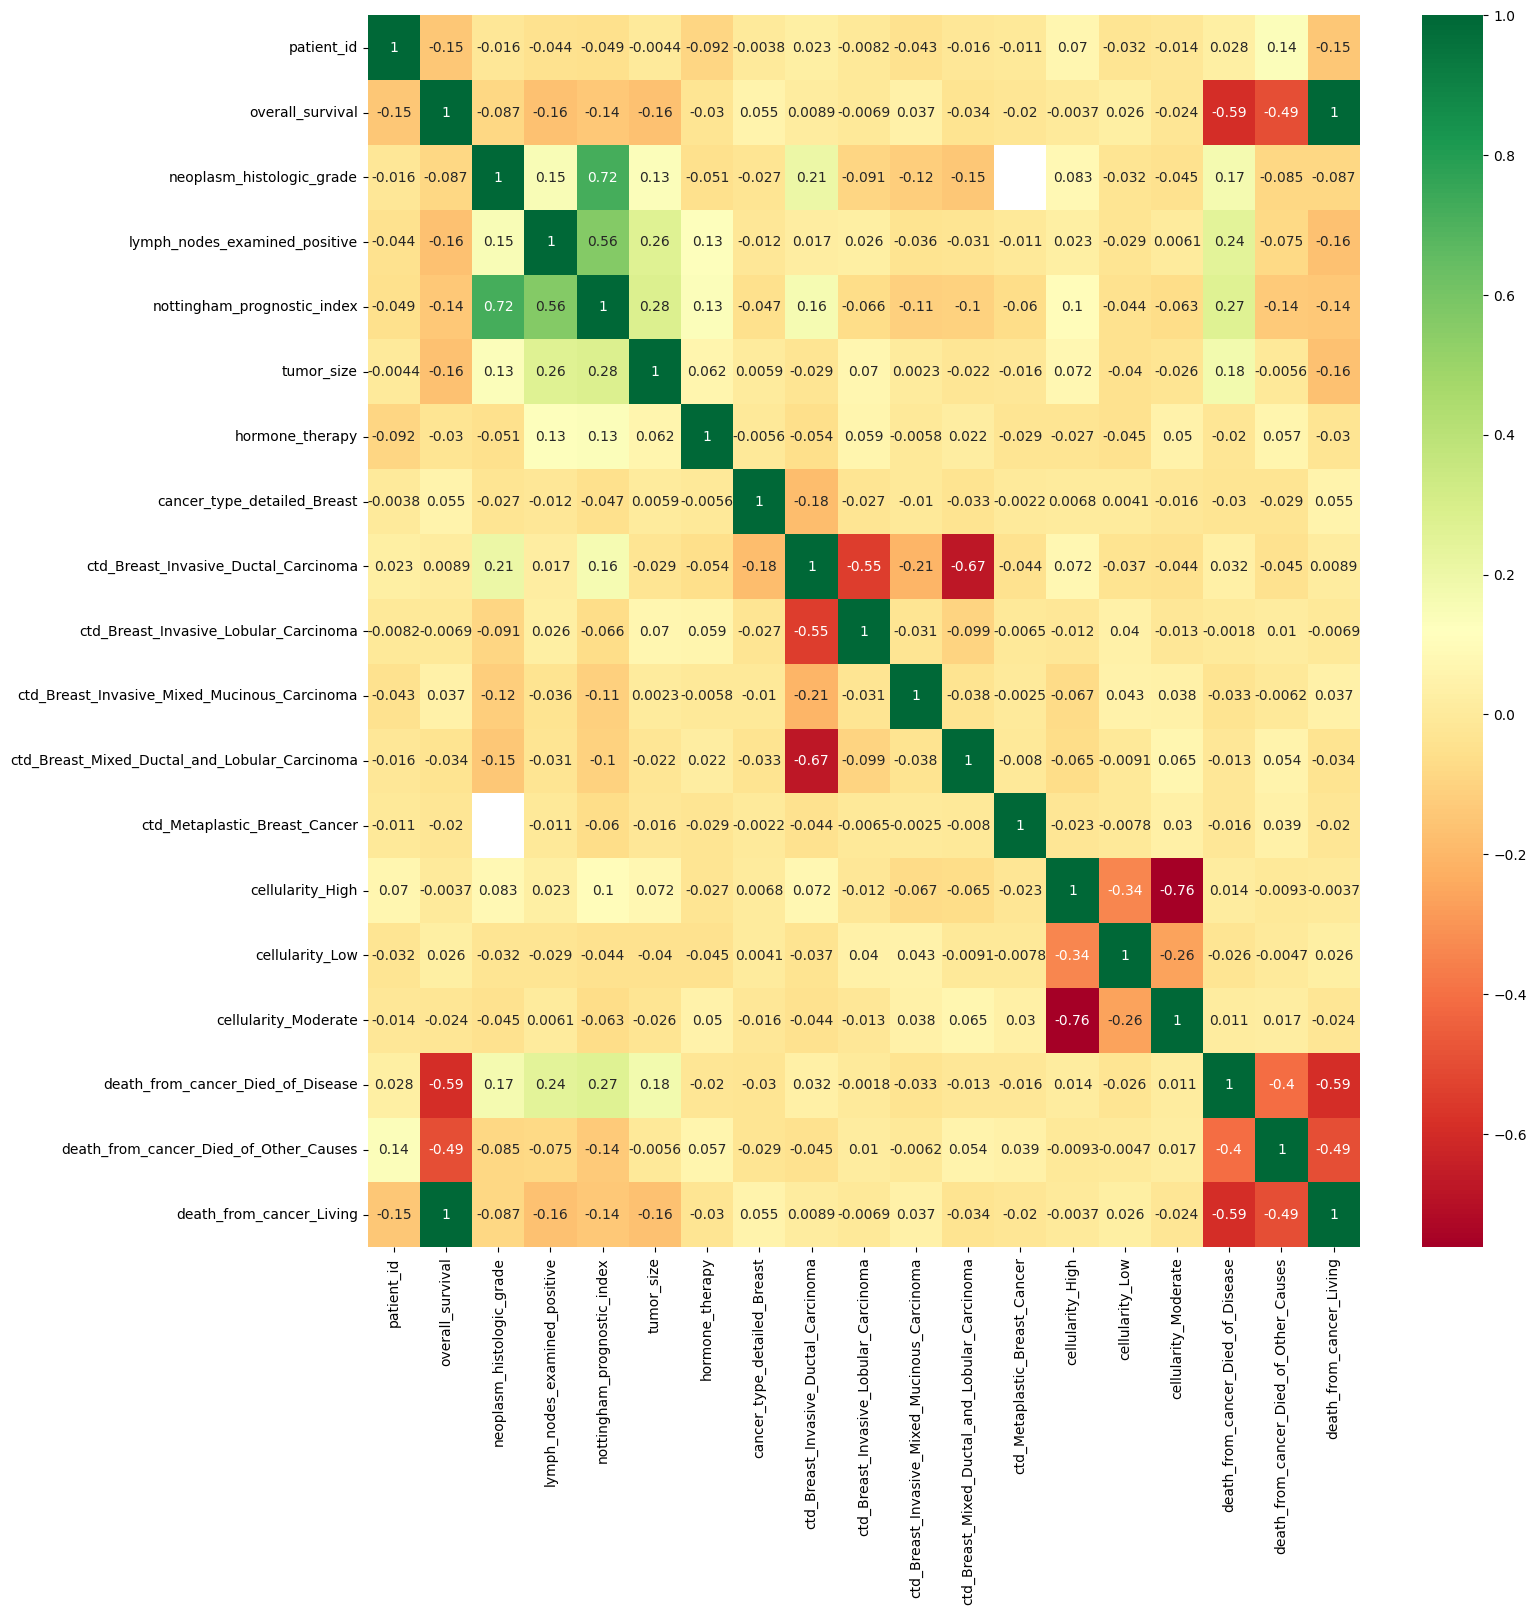

In [8]:
#comparando independencia entre variables
plt.figure(figsize = (16,16))
sns.heatmap(analisis1.corr(), annot = True, cmap = "RdYlGn")

In [9]:
# Tratamiento valores nulos
# ======================================================================

# Calculando media de columnas con valores nulos
def reemplazo_nulos(base_datos):
    for i in base_datos:
        if base_datos[i].any() == True:
            media = base_datos[i].mean()
            base_datos[i].fillna(media, inplace = True)
    return base_datos

analisis1 = reemplazo_nulos(analisis1)
analisis1.isnull().sum()

patient_id                                       0
overall_survival                                 0
neoplasm_histologic_grade                        0
lymph_nodes_examined_positive                    0
nottingham_prognostic_index                      0
tumor_size                                       0
hormone_therapy                                  0
cancer_type_detailed_Breast                      0
ctd_Breast_Invasive_Ductal_Carcinoma             0
ctd_Breast_Invasive_Lobular_Carcinoma            0
ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma     0
ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma    0
ctd_Metaplastic_Breast_Cancer                    0
cellularity_High                                 0
cellularity_Low                                  0
cellularity_Moderate                             0
death_from_cancer_Died_of_Disease                0
death_from_cancer_Died_of_Other_Causes           0
death_from_cancer_Living                         0
dtype: int64

> <h1> Tests </h1>

In [10]:
# D'Agostino
for i in analisis1:
    k2, p_value = stats.normaltest(analisis1[i])
    print(f"{i} = {k2}, p_valor = {p_value}")

patient_id = 1031.4157023980508, p_valor = 1.0738063060534453e-224
overall_survival = 7332.254123491217, p_valor = 0.0
neoplasm_histologic_grade = 156.114306118142, p_valor = 1.2595318480138823e-34
lymph_nodes_examined_positive = 1573.4760743914558, p_valor = 0.0
nottingham_prognostic_index = 14.08499100849108, p_valor = 0.0008739429104918542
tumor_size = 1437.4947960022523, p_valor = 0.0
hormone_therapy = 8165.562753177722, p_valor = 0.0
cancer_type_detailed_Breast = 3040.361146308996, p_valor = 0.0
ctd_Breast_Invasive_Ductal_Carcinoma = 369.9506848949872, p_valor = 4.636918758685444e-81
ctd_Breast_Invasive_Lobular_Carcinoma = 1244.6048253334625, p_valor = 5.463816480362379e-271
ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma = 2815.930890740889, p_valor = 0.0
ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma = 920.0579540260592, p_valor = 1.6291225968970406e-200
ctd_Metaplastic_Breast_Cancer = 5789.266441834434, p_valor = 0.0
cellularity_High = 6836.9059408724215, p_valor = 0.0
cellularity_

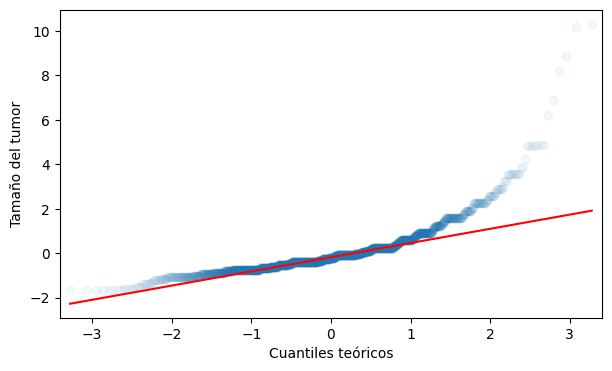

In [20]:
# Gráfico QQ
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(analisis1["tumor_size"], fit = True,  line = "q", alpha = 0.05, lw = 2, ax = ax)
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Tamaño del tumor")
plt.show()

In [11]:
# Chi cuadrado
from scipy.stats import chi2_contingency
  
# definiendo la tabla
data = [analisis1["overall_survival"], analisis1["tumor_size"]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpreta el p_valor
alpha = 0.05
print("El p-valor es: " + str(p))
if p <= alpha:
    print('Dependiente (rechaza H0)')
else:
    print('Independiente (H0 se mantiene verdadera)')

El p-valor es: 0.4362795630516269
Independiente (H0 se mantiene verdadera)


In [12]:
# Modelo de regresión lineal
def modelo():
    xi = [var_dep + "~"]
    for i in analisis2:
        xi[0] = xi[0] + "+" + i
    return xi[0]

MRL = smf.ols(modelo(), analisis1).fit()
MRL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_survival   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.007e+30
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:31:52   Log-Likelihood:                 61266.
No. Observations:                1903   AIC:                        -1.225e+05
Df Residuals:                    1884   BIC:                        -1.224e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                      9.159e-16   2.68e-15      0.342      0.732   -4.33e-15    6.16e-15
patient_id                                     1.508e-19   2.54e-20      5.931      0.000    1.01e-19    2.01e-19
neoplasm_histologic_grade                     -3.643e-16   1.34e-16     -2.719      0.007   -6.27e-16   -1.01e-16
lymph_nodes_examined_positive                   1.57e-16   1.89e-17      8.328      0.000     1.2e-16    1.94e-16
nottingham_prognostic_index                   -8.318e-16   9.11e-17     -9.130      0.000   -1.01e-15   -6.53e-16
tumor_size                                     1.283e-16   4.11e-18     31.205      0.000     1.2e-16    1.36e-16
hormone_therapy                               -1.124e-15   1.24e-16     -9.037      0.000   -1.37e-15    -8.8e-16
cancer_type_detailed_Breast                   -2.776e-16   9.18e-16     -0.302      0.762   -2.08e-15    1.52e-15
ctd_Breast_Invasive_Ductal_Carcinoma           5.551e-17   6.82e-16      0.081      0.935   -1.28e-15    1.39e-15
ctd_Breast_Invasive_Lobular_Carcinoma          4.441e-16   7.12e-16      0.624      0.533   -9.52e-16    1.84e-15
ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma  -8.882e-16   8.73e-16     -1.017      0.309    -2.6e-15    8.24e-16
ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma  2.776e-16   7.03e-16      0.395      0.693    -1.1e-15    1.66e-15
ctd_Metaplastic_Breast_Cancer                 -3.053e-16   2.64e-15     -0.116      0.908   -5.48e-15    4.87e-15
cellularity_High                              -3.955e-16   3.59e-16     -1.100      0.271    -1.1e-15    3.09e-16
cellularity_Low                               -4.302e-16   3.92e-16     -1.098      0.272    -1.2e-15    3.38e-16
cellularity_Moderate                          -5.898e-16   3.61e-16     -1.634      0.103    -1.3e-15    1.18e-16
death_from_cancer_Died_of_Disease              1.568e-15   2.55e-15      0.616      0.538   -3.42e-15    6.56e-15
death_from_cancer_Died_of_Other_Causes         9.368e-16   2.55e-15      0.368      0.713   -4.06e-15    5.93e-15
death_from_cancer_Living                          1.0000   2.54e-15   3.93e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                      730.613   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5326.754
Skew:                          -1.620   Prob(JB):                         0.00
Kurtosis:                      10.528   Cond. No.                     4.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[

In [13]:
# Eliminando columnas cuyo P-valor supera 0.05
def limpiador_pvalor(base_datos, regresion):
    for i in base_datos:
        if regresion.pvalues[i] > 0.05:
            base_datos = base_datos.drop([i], axis = 1)
    return base_datos

analisis2 = limpiador_pvalor(analisis2, MRL)
analisis3 = pd.concat([analisis2, y], axis = 1)
analisis3

,patient_id,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,tumor_size,hormone_therapy,death_from_cancer_Living,overall_survival
0,0,3.0,10.0,6.044,22.0,1,1,1
1,2,3.0,0.0,4.020,10.0,1,1,1
2,5,2.0,1.0,4.030,15.0,1,0,0
3,6,2.0,3.0,4.050,25.0,1,1,1
4,8,3.0,8.0,6.080,40.0,1,0,0
...,...,...,...,...,...,...,...,...
1899,7295,3.0,1.0,5.050,25.0,1,1,1
1900,7296,3.0,1.0,5.040,20.0,0,0,0
1901,7297,3.0,45.0,6.050,25.0,1,0,0
1902,7298,2.0,12.0,5.050,25.0,1,0,0


In [14]:
# Regresión con las variables contribuyentes al modelo
MRL_2 = smf.ols(modelo(), analisis3).fit()
MRL_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_survival   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.063e+31
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:31:52   Log-Likelihood:                 59097.
No. Observations:                1815   AIC:                        -1.182e+05
Df Residuals:                    1807   BIC:                        -1.181e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -1.077e-15   2.22e-16     -4.843      0.000   -1.51e-15   -6.41e-16
patient_id                    -1.118e-19   1.77e-20     -6.318      0.000   -1.47e-19   -7.71e-20
neoplasm_histologic_grade     -2.463e-16   1.09e-16     -2.254      0.024   -4.61e-16    -3.2e-17
lymph_nodes_examined_positive -1.323e-16   1.47e-17     -9.008      0.000   -1.61e-16   -1.03e-16
nottingham_prognostic_index     9.42e-16   8.33e-17     11.312      0.000    7.79e-16    1.11e-15
tumor_size                     3.524e-17   2.88e-18     12.254      0.000    2.96e-17    4.09e-17
hormone_therapy               -1.463e-15   8.83e-17    -16.575      0.000   -1.64e-15   -1.29e-15
death_from_cancer_Living          1.0000   8.63e-17   1.16e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                        6.808   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.870
Skew:                          -0.150   Prob(JB):                       0.0322
Kurtosis:                       2.963   Cond. No.                     2.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# ANOVA
tabla_anova = sm.stats.anova_lm(MRL_2, typ = 3)
tabla_anova

,sum_sq,df,F,PR(>F)
Intercept,7.210702e-29,1.0,2.345316e+01,1.389010e-06
patient_id,1.227184e-28,1.0,3.991476e+01,3.332389e-10
neoplasm_histologic_grade,1.561506e-29,1.0,5.078875e+00,2.433850e-02
lymph_nodes_examined_positive,2.494890e-28,1.0,8.114753e+01,5.185892e-19
nottingham_prognostic_index,3.934059e-28,1.0,1.279572e+02,1.032739e-28
tumor_size,4.616337e-28,1.0,1.501486e+02,3.218780e-33
hormone_therapy,8.446293e-28,1.0,2.747198e+02,1.509259e-57
death_from_cancer_Living,4.128492e+02,1.0,1.342813e+32,0.000000e+00
Residual,5.555642e-27,1807.0,NaN,NaN


ValueError: The data contains non-finite values.

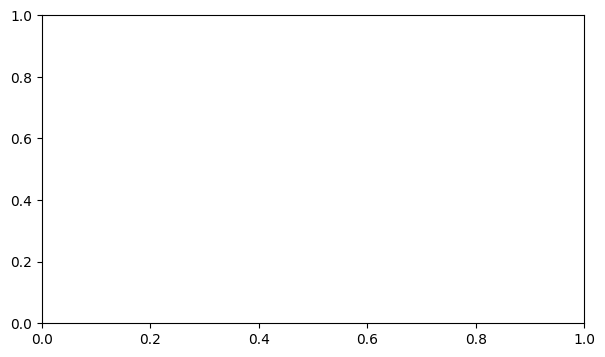

In [ ]:

NOX_predict = MRL_2.predict(analisis3[["patient_id", "neoplasm_histologic_grade", "lymph_nodes_examined_positive",
                                       "ctd_Metaplastic_Breast_Cancer", "death_from_cancer_Living"]])
analisis3["NOX_predict"] = NOX_predict

x = analisis3["overall_survival"] #todos los valores de la variable NOx
y = analisis3["NOX_predict"] #todos los valores de la variable Nox estimada con MLRM

#Calculando los coeficientes del ajuste de regresión:
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio
r = np.corrcoef(x, y) # r = coeficiente de correlación

plt.subplot(111)
plt.scatter(x,y, color="r", s=20)
plt.xlabel("NO$_x$ (µg/$m^3$)")
plt.ylabel("NO$_x$ Predict (µg/$m^3$)")
plt.plot(x, a * x + b, color="skyblue")
plt.text(10,55, 'r = {0:2.2f}'.format(r[0,1]))
#plt.text(10,55, 'NO$_x$ = {0:2.2f} NO$_x$ Predict + {1:2.3f}'.format(a,b))
plt.savefig("C:/Users/heber/Desktop/CURSO_GRAFICOS_EN_PYTHON/Regresión Lineal Multiple/nox_predict.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()

In [ ]:
from sklearn import preprocessing #escalando datos analisis2

d = preprocessing.MinMaxScaler(feature_range = (0,1))

col = analisis2.columns
res = d.fit_transform(analisis2)

scaled_df = pd.DataFrame(res, columns=col)
scaled_df.head()

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(25, 4))
for idx, feature in enumerate(list(analisis3.columns)[:3]):

    sns.boxplot( x='overall_survival', y=feature, data=analisis3, ax=axes[idx])
plt.show()  


 





In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(25, 4))
for idx1, feature in enumerate(list(analisis3.columns)[4:9]):

    sns.boxplot( x='overall_survival', y=feature, data=analisis3, ax=axes[idx1])
plt.show() 

In [ ]:
sns.pairplot(analisis3, hue='overall_survival', size=4)
plt.show()


> <h1> Cosas por hacer </h1>
>
> <h2> Limpieza de datos </h2>
>
> - Proponer la ecuación lineal
> - Normalizar la base de datos
> - Calcular parámetros estadísticos
>
> <h2> Prueba de hipótesis </h2>
>
> - Plantear hipótesis nula y alternativa
> - Graficar distribución
> - Plantear un modelo que se ajuste a la distribución
> - Aceptar o rechazar hipótesis nula
>
> <h2> Prueba ANOVA </h2>
>
> -